In [2]:
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

## Hardware used for Neural network

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Oct  8 15:34:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    44W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


# Decision Tree

In [42]:
train_x = pd.read_csv('data/x_train.csv', low_memory=False)
train_y = pd.read_csv('data/y_train.csv', low_memory=False)

In [7]:
train_x['class'] = train_y['class']

In [8]:
train_x.describe()

age            sex          chest  resting_blood_pressure  \
count  300000.000000  300000.000000  300000.000000           300000.000000   
mean       54.410310       0.678577       3.169558              131.340200   
std         9.097727       0.467024       0.950532               17.807229   
min        27.174373       0.000000      -0.267614               82.918527   
25%        48.060686       0.000000       3.000000              119.945843   
50%        55.116959       1.000000       3.000000              129.731240   
75%        60.661279       1.000000       4.000000              139.913376   
max        79.283485       1.000000       4.000000              209.673650   

       ...          slope  number_of_major_vessels           thal  \
count  ...  300000.000000            300000.000000  300000.000000   
mean   ...       1.596153                 0.682073       4.714183   
std    ...       0.629462                 0.950810       1.935105   
min    ...       1.000000                 0.000000       3.000000   
25%    ...       1.000000                 0.000000       3.000000   
50%    ...       2.000000                 0.000000       3.000000   
75%    ...       2.000000                 1.000000       7.000000   
max    ...       3.000000                 3.000000       7.000000   

               class  
count  300000.000000  
mean        0.443803  
std         0.496833  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  

[8 rows x 14 columns]

In [43]:
test_x = pd.read_csv('data/x_test.csv', low_memory=False)
test_y = pd.read_csv('data/y_test.csv', low_memory=False)

In [10]:
# test_x['class'] = test_y['class']

In [11]:
test_x.describe()

age            sex          chest  resting_blood_pressure  \
count  300000.000000  300000.000000  300000.000000           300000.000000   
mean       54.441861       0.676317       3.170936              131.340770   
std         9.074327       0.467882       0.948705               17.877632   
min        26.061695       0.000000      -0.538498               83.961096   
25%        48.096266       0.000000       3.000000              119.900550   
50%        55.151644       1.000000       3.000000              129.724700   
75%        60.665707       1.000000       4.000000              139.916470   
max        79.591647       1.000000       4.000000              209.284849   

       ...          slope  number_of_major_vessels           thal  \
count  ...  300000.000000            300000.000000  300000.000000   
mean   ...       1.595913                 0.680533       4.708573   
std    ...       0.630181                 0.950528       1.934426   
min    ...       1.000000                 0.000000       3.000000   
25%    ...       1.000000                 0.000000       3.000000   
50%    ...       2.000000                 0.000000       3.000000   
75%    ...       2.000000                 1.000000       7.000000   
max    ...       3.000000                 3.000000       7.000000   

               class  
count  300000.000000  
mean        0.444567  
std         0.496918  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  

[8 rows x 14 columns]

In [12]:
categorical_columns = list(train_x.columns)
categorical_columns.remove('class')

In [13]:
# train = TabularPandas(train_x,[], categorical_columns, [], y_names='class')

In [14]:
# test = TabularPandas(test_x, [], categorical_columns, [], y_names='class')

In [15]:
xs,y = train.train.xs,train.train.y
valid_xs,valid_y = test.train.xs,test.train.y

In [33]:
model = DecisionTreeClassifier(max_leaf_nodes=25)
model.fit(xs, y);

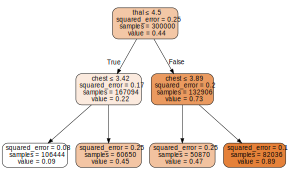

In [34]:
draw_tree(model, xs, size=4, leaves_parallel=True, precision=2)

In [35]:
samp_idx = np.random.permutation(len(y))[:10000]
dtreeviz(model, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, target_name= 'class',
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

/Users/nandangrover/miniforge3/envs/deeplearning_2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [46]:
model_decision = DecisionTreeRegressor(min_samples_leaf=25)
model_decision.fit(train_x, train_y)

DecisionTreeRegressor(min_samples_leaf=25)

## Accuracy of Decision Tree

In [47]:
model_decision.score(test_x, test_y)

0.6602832195623745

In [21]:
cross_val_score(model_decision, valid_xs, valid_y, cv=10)

array([0.66400386, 0.6559335 , 0.65249392, 0.6653112 , 0.66316512, 0.65775506, 0.65870171, 0.65495224, 0.66375877, 0.65900026])

# Reducing min sample leafs to see if it reduces the accuracy

In [22]:
model_decision_reduced_leaf = DecisionTreeRegressor(min_samples_leaf=5)
model_decision_reduced_leaf.fit(xs, y)
cross_val_score(model_decision_reduced_leaf, valid_xs, valid_y, cv=10)

array([0.57246611, 0.55862973, 0.55099851, 0.55824466, 0.56743257, 0.55873106, 0.55784627, 0.55774602, 0.56644084, 0.55881489])

# Feature Importance

In [23]:
def rf_feat_importance(model, df):
    return pd.DataFrame({'cols':df.columns, 'imp':model.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [24]:
fi = rf_feat_importance(model_decision, xs)
fi[:10]

cols       imp
12                         thal  0.353374
2                         chest  0.194070
11      number_of_major_vessels  0.139919
7   maximum_heart_rate_achieved  0.073010
9                       oldpeak  0.056415
10                        slope  0.048525
0                           age  0.045467
8       exercise_induced_angina  0.040885
4             serum_cholestoral  0.014881
3        resting_blood_pressure  0.012019

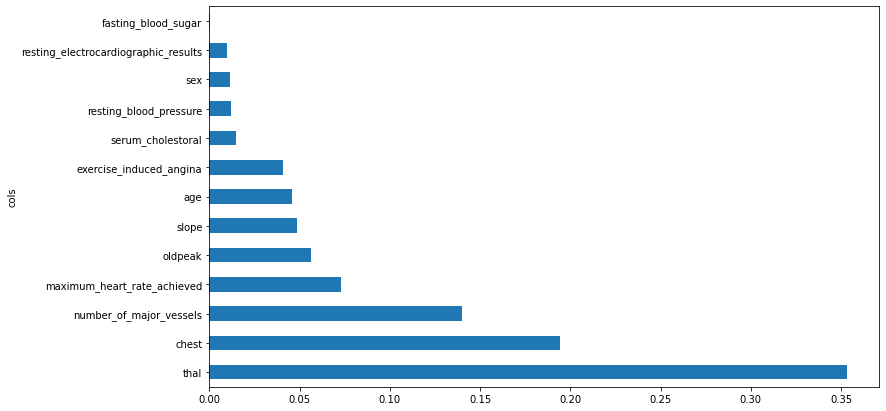

In [25]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

# Removing Low-Importance Variables

It seems likely that we could use just a subset of the columns by removing the variables of low importance and still get good results. Let's try just keeping those with a feature importance greater than 0.005:

In [26]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

12

In [27]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [28]:
model_decision = DecisionTreeRegressor(min_samples_leaf=25)
model_decision.fit(xs_imp, y)

DecisionTreeRegressor(min_samples_leaf=25)

## Accuracy of Decision Tree with Low-Importance Variables Removed

In [29]:
model_decision.score(valid_xs_imp, valid_y)

0.6600580827732447

In [30]:
cross_val_score(model_decision, valid_xs_imp, valid_y, cv=10)

array([0.66368951, 0.65581716, 0.65245201, 0.66555347, 0.66432373, 0.65790487, 0.65851342, 0.65507942, 0.66401761, 0.6587878 ])

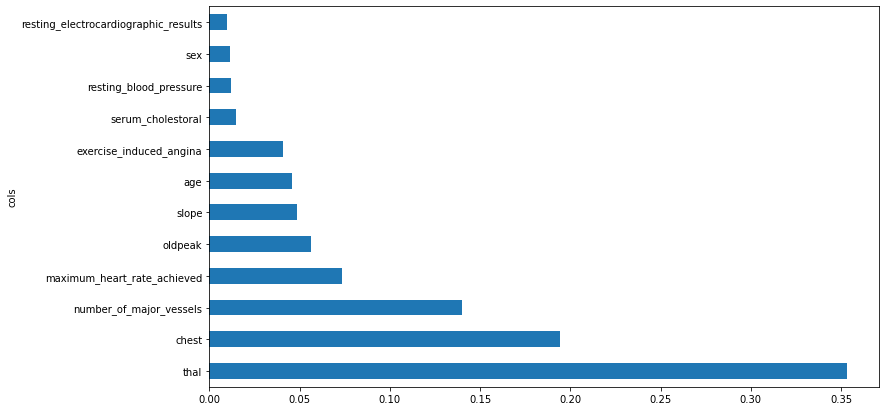

In [31]:
plot_fi(rf_feat_importance(model_decision, xs_imp));

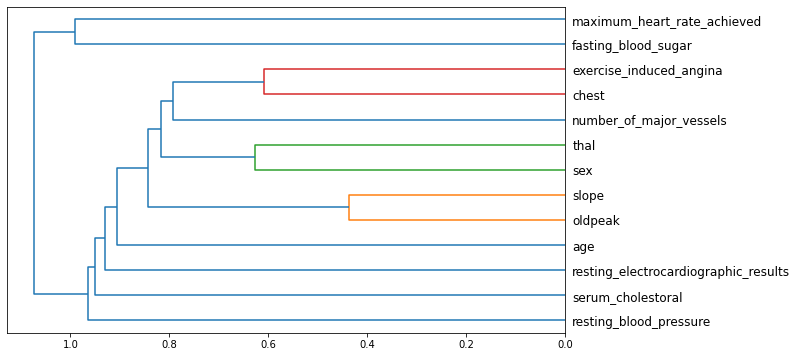

In [32]:
cluster_columns(xs)

# Extra Credit - Random Forest, Gradient Boosting and Neural Network

## Random Forest

In [187]:
def rf(xs, y, n_estimators=200, max_samples=200_000,
       max_features=0.5, min_samples_leaf=10, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [188]:
model_forest = rf(xs_imp, y);

In [189]:
model_forest.score(valid_xs_imp, valid_y)

0.6994905136766879

In [190]:
cross_val_score(model_forest, valid_xs_imp, valid_y, cv=10)

array([0.70057164, 0.69516803, 0.69107263, 0.70300824, 0.70277806, 0.69957276, 0.6987816 , 0.6969131 , 0.70213241, 0.69729104])

## Gradient Boosting Regressor

This estimator has native support for missing values (NaNs). During training, the tree grower learns at each split point whether samples with missing values should go to the left or right child, based on the potential gain. When predicting, samples with missing values are assigned to the left or right child consequently. If no missing values were encountered for a given feature during training, then samples with missing values are mapped to whichever child has the most samples.

In [191]:
model_gradient = HistGradientBoostingRegressor().fit(xs_imp, y)

In [192]:
model_gradient.score(valid_xs_imp, valid_y)

0.6985193608059291

In [193]:
cross_val_score(model_gradient, valid_xs_imp, valid_y, cv=10)

array([0.69948008, 0.69578657, 0.69182798, 0.70343526, 0.70103296, 0.69801357, 0.69801371, 0.6975185 , 0.70134007, 0.69633172])

## Neural Network using FastAI

With over 60,000 examples and 5 epochs the network was introudced to over 300,000 examples. This is a lot of data for a neural network to learn from. The accuracy of the neural network is 0.55 which is lower than decision tree because of the limited hardware resources. The neural network is also slower than the decision tree.

In [30]:
procs_nn = [Categorify, FillMissing, Normalize]

In [31]:
train_x['class'] = train_x['class'].astype((np.float32))
test_x['class'] = test_x['class'].astype((np.float32))

train_x['age'] = train_x['age'].astype((np.float32))
test_x['age'] = test_x['age'].astype((np.float32))

In [32]:
combined_data = pd.concat([train_x, test_x])

In [33]:
splits = RandomSplitter()(range_of(combined_data))

In [34]:
df = TabularPandas(combined_data, procs_nn, list(to_keep), [], y_names='class', splits=splits)

In [35]:
dataLaoders = df.dataloaders(64)

In [36]:
learn = tabular_learner(dataLaoders)

In [37]:
if os.path.exists('data/models/nn'):
  learn.load('data/models/nn.pkl')
else:
  learn.fit_one_cycle(5, 1e-2)

In [38]:
learn.export('data/models/nn.pkl')

In [39]:
preds,targs = learn.get_preds()

In [46]:
learn.show_results()

In [59]:
accuracy(preds, targs)

TensorBase(0.5575)